In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("MarketData.csv", encoding = "utf-8")
df.head()

,Month,GDP,BankRate,CPI,FederalRate,IPI,UnEmpRate,Oil,Commodity,TradeBal,Housing,BuildingPermit,SP500,DowJones,year,mon
0,2005-01,12761.34,5.25,191.6,2.28,98.79,5.3,83.76,150.9,-55561.0,4.4,2139.0,1181.41,10539.51,2005,1
1,2005-02,12761.34,5.49,192.4,2.50,99.45,5.4,84.61,151.6,-57454.0,4.3,2114.0,1199.63,10723.82,2005,2
2,2005-03,12761.34,5.58,193.1,2.63,99.32,5.2,86.14,153.7,-52619.0,4.1,2062.0,1194.90,10682.09,2005,3
3,2005-04,12910.02,5.75,193.7,2.79,99.46,5.2,85.55,155.0,-57115.0,4.3,2150.0,1164.43,10283.19,2005,4
4,2005-05,12910.02,5.98,193.6,3.00,99.60,5.1,84.69,154.3,-56264.0,4.2,2085.0,1178.28,10377.18,2005,5


---

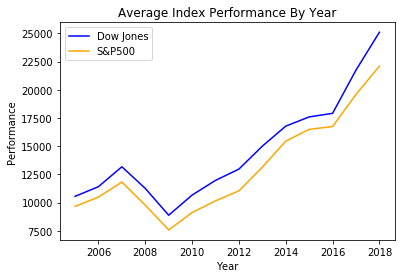

In [44]:
yearly = df.groupby(by = "year")
yearly_dow = yearly["DowJones"].mean()
yearly_sp = yearly["SP500"].mean()
yearly_dow_df = pd.DataFrame({"Average Performance of Dow Jones By Year": yearly_dow})
yearly_sp_df = pd.DataFrame({"Average Performance of S&P500 By Year": yearly_sp})
yearly_dow_df.reset_index(inplace=True)
yearly_sp_df.reset_index(inplace=True)

plt.plot(yearly_dow_df['year'], yearly_dow_df['Average Performance of Dow Jones By Year'], c="blue", label="Dow Jones")
plt.plot(yearly_sp_df['year'], yearly_sp_df['Average Performance of S&P500 By Year'] *8, c="orange", label="S&P500")
#plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
#plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Average Index Performance By Year")
plt.xlabel("Year")
plt.ylabel("Performance")
plt.savefig("Average Index Performance By Year.png")
plt.show()

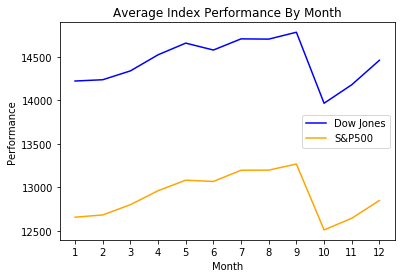

In [57]:
seasonal = df.groupby(by = "mon")
mon_dow = seasonal["DowJones"].mean()
mon_sp = seasonal["SP500"].mean()
monthly_dow_df = pd.DataFrame({"Average Performance of Dow Jones By Month": mon_dow})
monthly_sp_df = pd.DataFrame({"Average Performance of S&P500 By Month": mon_sp})
monthly_dow_df.reset_index(inplace=True)
monthly_sp_df.reset_index(inplace=True)

plt.plot(monthly_dow_df['mon'], monthly_dow_df['Average Performance of Dow Jones By Month'], c="blue", label="Dow Jones")
plt.plot(monthly_sp_df['mon'], monthly_sp_df['Average Performance of S&P500 By Month'] *8, c="orange", label="S&P500")
plt.legend()
plt.xticks(np.arange(1, 13, 1))
plt.title("Average Index Performance By Month")
plt.xlabel("Month")
plt.ylabel("Performance")
plt.savefig("Average Index Performance By Month.png")
plt.show()

---

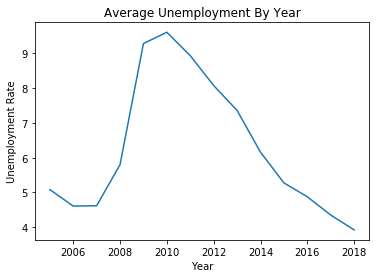

In [61]:
yearly = df.groupby(by = "year")
yearly_unemp = yearly["UnEmpRate"].mean()
yearly_unemp_df = pd.DataFrame({"Average Unemployment By Year": yearly_unemp})
yearly_unemp_df.reset_index(inplace=True)

yearly_unemp_df.plot(x = 'year', y = 'Average Unemployment By Year', kind = 'line', legend = False)
plt.ylabel('Unemployment Rate')
plt.title("Average Unemployment By Year")
plt.xlabel('Year')
plt.savefig("Average Unemployment By Year.png")
plt.show()

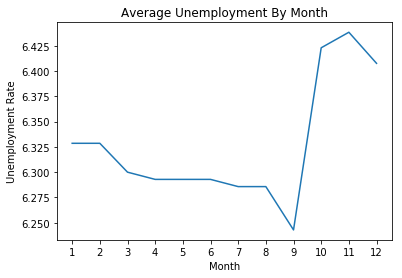

In [55]:
seasonal = df.groupby(by = "mon")
mon_unemp = seasonal["UnEmpRate"].mean()
monthly_unemp_df = pd.DataFrame({"Average Unemployment By Month": mon_unemp})
monthly_unemp_df.reset_index(inplace=True)

monthly_unemp_df.plot(x = 'mon', y = 'Average Unemployment By Month', kind = 'line', legend = False)
plt.xticks(np.arange(1, 13, 1))
plt.ylabel('Unemployment Rate')
plt.xlabel('Month')
plt.title("Average Unemployment By Month")
plt.savefig("Average Unemployment By Month.png")
plt.show()

---

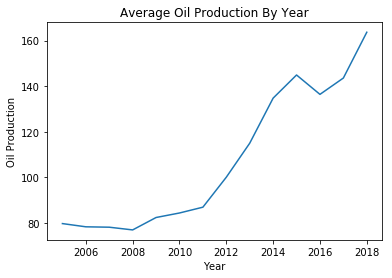

In [60]:
yearly = df.groupby(by = "year")
yearly_oil = yearly["Oil"].mean()
yearly_oil_df = pd.DataFrame({"Average Oil Production By Year": yearly_oil})
yearly_oil_df.reset_index(inplace=True)

yearly_oil_df.plot(x = 'year', y = 'Average Oil Production By Year', kind = 'line', legend = False)
plt.ylabel('Oil Production')
plt.xlabel('Year')
plt.title("Average Oil Production By Year")
plt.savefig("Average Oil Production By Year.png")
plt.show()

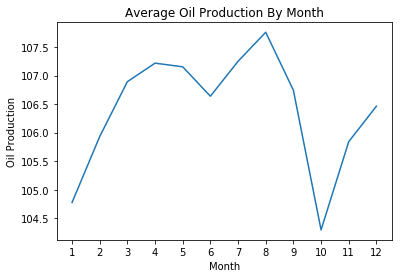

In [56]:
seasonal = df.groupby(by = "mon")
monthly_oil = seasonal["Oil"].mean()
monthly_oil_df = pd.DataFrame({"Average Oil Production By Month": monthly_oil})
monthly_oil_df.reset_index(inplace=True)

monthly_oil_df.plot(x = 'mon', y = 'Average Oil Production By Month', kind = 'line', legend = False)
plt.xticks(np.arange(1, 13, 1))
plt.ylabel('Oil Production')
plt.xlabel('Month')
plt.title("Average Oil Production By Month")
plt.savefig("Average Oil Production By Month.png")
plt.show()

---

In [62]:
#Split data into X and y
from sklearn.model_selection import train_test_split
#X = df.drop("DowJones", axis = 1)
X = df.drop("Month", axis = 1)
X = X.drop("CPI", axis = 1)
#X = X.drop("SP500", axis = 1)
y = df["CPI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [10]:
#Build model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit model to data 
model.fit(X_train, y_train)

#Evaluate model using R2 Score 
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.9980687027243839


In [64]:
model.coef_

array([ 1.80281404e-03,  7.59797703e-01, -4.49103602e-01, -2.63741922e-01,
       -7.29084307e-01,  1.24311698e-02,  2.71322766e-01,  1.51792464e-05,
        1.95047861e-02, -1.09360349e-03, -2.84533866e-03,  1.06044707e-04,
        2.49580194e+00,  2.34799370e-01])

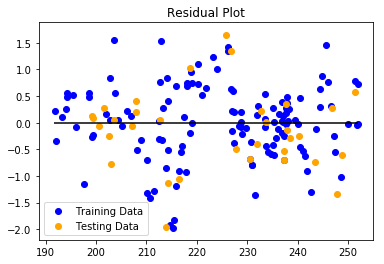

In [12]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

plt.show()